# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import matplotlib.pyplot as plt

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

606

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
base_url = "http://api.openweathermap.org/data/2.5/weather?"

weather_df = pd.DataFrame({
    "City Name":[],
    "Country":[],
    "Latitude":[],
    "Longitude":[],
    "Date":[],
    "Temperature":[], 
    "Humidity":[],
    "Wind Speed":[],
    "Clouds":[]
})
weather_df

print("""
                             Beginning Data Retrieval
--------------------------------------------------------------------------------
""")
count = 1

for i in range(len(cities)):
    try:
        query_url = f"{base_url}appid={api_keys.api_key}&q={cities[i]}&units=imperial"
        print(f"Processing Record {count} of Set 1 | {cities[i]}")
        
        response = requests.get(query_url)
        weather_json = response.json()
        
        city_country = weather_json["sys"]["country"]
        city_latitude = weather_json["coord"]["lat"]
        city_longitude = weather_json["coord"]["lat"]
        city_date = time.strftime('%Y-%m-%d', time.localtime(weather_json["dt"]))
        city_max_temperature = weather_json["main"]["temp_max"]
        city_humidity = weather_json["main"]["humidity"]
        city_windspeed = weather_json["wind"]["speed"]
        city_cloud = weather_json["clouds"]["all"]
        
        weather_df = weather_df.append({
            "City Name":cities[i],
            "Country":city_country,
            "Latitude":city_latitude,
            "Longitude":city_longitude,
            "Date":city_date,
            "Temperature":city_max_temperature, 
            "Humidity":city_humidity,
            "Wind Speed":city_windspeed,
            "Clouds":city_cloud
        }, ignore_index=True)
        count+=1
    except:
        print("Insufficient data. Skipping..")
print("""
--------------------------------------------------------------------------------
                                Data Retrieval Complete
--------------------------------------------------------------------------------
""")


                             Beginning Data Retrieval
--------------------------------------------------------------------------------

Processing Record 1 of Set 1 | hilo
Processing Record 2 of Set 1 | mataura
Processing Record 3 of Set 1 | arraial do cabo
Processing Record 4 of Set 1 | nerchinskiy zavod
Processing Record 5 of Set 1 | tsihombe
Insufficient data. Skipping..
Processing Record 5 of Set 1 | bethel
Processing Record 6 of Set 1 | hihifo
Insufficient data. Skipping..
Processing Record 6 of Set 1 | chuy
Processing Record 7 of Set 1 | punta arenas
Processing Record 8 of Set 1 | shushtar
Processing Record 9 of Set 1 | coihaique
Processing Record 10 of Set 1 | tarudant
Insufficient data. Skipping..
Processing Record 10 of Set 1 | bambanglipuro
Processing Record 11 of Set 1 | aflu
Insufficient data. Skipping..
Processing Record 11 of Set 1 | rawson
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | severo-kurilsk
Processing Record 14 of Set 1 | upernavik
Pro

Processing Record 148 of Set 1 | mamlyutka
Processing Record 149 of Set 1 | makakilo city
Processing Record 150 of Set 1 | tucuman
Processing Record 151 of Set 1 | charlestown
Processing Record 152 of Set 1 | kamenka
Processing Record 153 of Set 1 | hastings
Processing Record 154 of Set 1 | mokolo
Processing Record 155 of Set 1 | pevek
Processing Record 156 of Set 1 | taburao
Insufficient data. Skipping..
Processing Record 156 of Set 1 | butaritari
Processing Record 157 of Set 1 | saint-germain-de-grantham
Processing Record 158 of Set 1 | itarema
Processing Record 159 of Set 1 | cap malheureux
Processing Record 160 of Set 1 | saint-philippe
Processing Record 161 of Set 1 | xiaoshi
Processing Record 162 of Set 1 | eseka
Processing Record 163 of Set 1 | tasiilaq
Processing Record 164 of Set 1 | solsvik
Insufficient data. Skipping..
Processing Record 164 of Set 1 | salta
Processing Record 165 of Set 1 | sorong
Processing Record 166 of Set 1 | alofi
Processing Record 167 of Set 1 | mahebou

Processing Record 310 of Set 1 | saint-francois
Processing Record 311 of Set 1 | beidao
Processing Record 312 of Set 1 | atasu
Processing Record 313 of Set 1 | guozhen
Processing Record 314 of Set 1 | the valley
Processing Record 315 of Set 1 | morondava
Processing Record 316 of Set 1 | sao jose da coroa grande
Processing Record 317 of Set 1 | narsaq
Processing Record 318 of Set 1 | olafsvik
Insufficient data. Skipping..
Processing Record 318 of Set 1 | constitucion
Processing Record 319 of Set 1 | santa vitoria do palmar
Processing Record 320 of Set 1 | tadine
Processing Record 321 of Set 1 | belmonte
Processing Record 322 of Set 1 | aberdeen
Processing Record 323 of Set 1 | lata
Processing Record 324 of Set 1 | sentyabrskiy
Insufficient data. Skipping..
Processing Record 324 of Set 1 | suntar
Processing Record 325 of Set 1 | coahuayana
Processing Record 326 of Set 1 | luzhou
Processing Record 327 of Set 1 | liku
Processing Record 328 of Set 1 | izyum
Processing Record 329 of Set 1 | 

Processing Record 476 of Set 1 | ranong
Processing Record 477 of Set 1 | taraz
Processing Record 478 of Set 1 | norman wells
Processing Record 479 of Set 1 | samarai
Processing Record 480 of Set 1 | senador pompeu
Processing Record 481 of Set 1 | koosa
Processing Record 482 of Set 1 | os
Insufficient data. Skipping..
Processing Record 482 of Set 1 | cheuskiny
Insufficient data. Skipping..
Processing Record 482 of Set 1 | shimoda
Processing Record 483 of Set 1 | tatui
Processing Record 484 of Set 1 | polis
Processing Record 485 of Set 1 | marica
Processing Record 486 of Set 1 | puerto escondido
Processing Record 487 of Set 1 | urumqi
Insufficient data. Skipping..
Processing Record 487 of Set 1 | omsukchan
Processing Record 488 of Set 1 | umm ruwabah
Insufficient data. Skipping..
Processing Record 488 of Set 1 | jumla
Processing Record 489 of Set 1 | yumen
Processing Record 490 of Set 1 | wajid
Processing Record 491 of Set 1 | praia da vitoria
Processing Record 492 of Set 1 | ust-omchug


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# Display the DataFrame
weather_df

,City Name,Country,Latitude,Longitude,Date,Temperature,Humidity,Wind Speed,Clouds
0,hilo,US,19.71,19.71,2019-03-10,73.99,69.0,14.99,90.0
1,mataura,NZ,-46.19,-46.19,2019-03-10,68.00,71.0,1.01,64.0
2,arraial do cabo,BR,-22.97,-22.97,2019-03-10,79.09,94.0,8.77,44.0
3,nerchinskiy zavod,RU,51.31,51.31,2019-03-10,17.03,32.0,10.45,8.0
4,bethel,US,60.79,60.79,2019-03-10,37.40,93.0,4.70,90.0
5,chuy,UY,-33.69,-33.69,2019-03-10,62.89,88.0,9.78,0.0
6,punta arenas,CL,-53.16,-53.16,2019-03-10,53.60,76.0,19.46,90.0
7,shushtar,IR,32.05,32.05,2019-03-10,50.00,87.0,4.70,0.0
8,coihaique,CL,-45.58,-45.58,2019-03-10,59.00,58.0,3.36,0.0
9,bambanglipuro,ID,-7.95,-7.95,2019-03-10,81.79,94.0,4.18,24.0


In [5]:
# Export to CSV
weather_df.to_csv(r'cities.csv')

In [6]:
# Describe DataFrame
weather_df.describe()

,Latitude,Longitude,Temperature,Humidity,Wind Speed,Clouds
count,531.000000,531.000000,531.000000,531.000000,531.000000,531.000000
mean,21.671714,21.671714,52.745367,76.293785,7.707250,39.246704
std,33.451864,33.451864,25.189847,19.121665,5.420817,35.453096
min,-54.810000,-54.810000,-16.010000,15.000000,0.380000,0.000000
25%,-6.020000,-6.020000,33.800000,64.500000,3.620000,0.000000
50%,28.660000,28.660000,58.790000,80.000000,5.820000,36.000000
75%,49.370000,49.370000,74.040000,92.000000,10.370000,75.000000
max,78.220000,78.220000,100.990000,100.000000,29.910000,100.000000


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

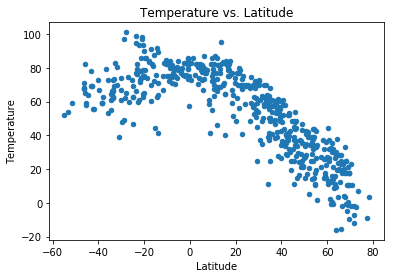

In [15]:
lat_tmp_plt = weather_df.plot.scatter(x='Latitude', y='Temperature', title='Temperature vs. Latitude')

plt.savefig('Temperature vs Latitude.png')

#### Latitude vs. Humidity Plot

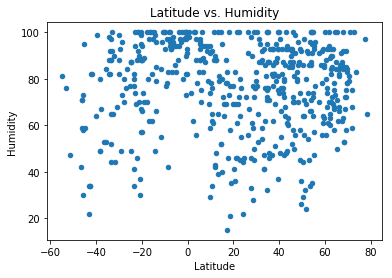

In [12]:
lat_hum_plt = weather_df.plot.scatter(x='Latitude', y='Humidity', title='Latitude vs. Humidity')

plt.savefig('Latitude vs. Humidity.png')

#### Latitude vs. Cloudiness Plot

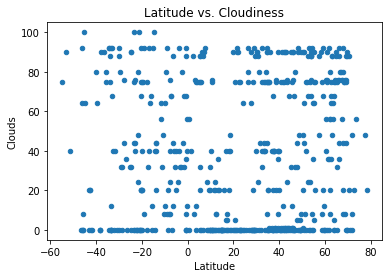

In [13]:
lat_cld_plt = weather_df.plot.scatter(x='Latitude', y='Clouds', title='Latitude vs. Cloudiness')

plt.savefig('Latitude vs. Cloudiness.png')

#### Latitude vs. Wind Speed Plot

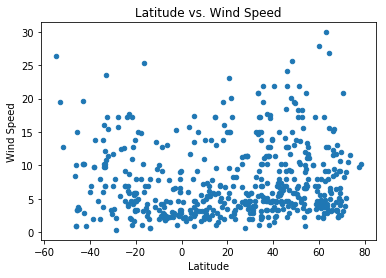

In [14]:
lat_wspeed_plt = weather_df.plot.scatter(x='Latitude', y='Wind Speed', title='Latitude vs. Wind Speed')

plt.savefig('Latitude vs. Wind Speed.png')